<a href="https://colab.research.google.com/github/Rodrigoradzinski/Rodrigoradzinski-Mineracao-de-dados-PredictWorldCups2022/blob/main/MINERA%C3%87%C3%83O_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAÇÃO DAS BIBLIOTECAS**

In [1]:
#mportando duas bibliotecas para ser possível importar dados
from google.colab import files 
import io 
import numpy as np 
import glob
#realizado importação da biblioteca pandas para que seja possivel realizar o pre processamento dos dados.
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas
#realizado importação da biblioteca para reazlizar platagem de graficos
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pygments.token import String
from pandas.core.reshape.merge import string
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #padronizaçao
from sklearn.preprocessing import MinMaxScaler  #Normalização
from matplotlib.ticker import scale_range
from sklearn.model_selection import train_test_split  #treino
from sklearn.ensemble import RandomForestClassifier #Floresta aleatória
from sklearn.tree import DecisionTreeClassifier #Arvore de decisão
from sklearn import tree ##importei essa porque dava erro utilizando so a DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix ##para cria matriz de confusão
import os
import graphviz  ##desenhar arvorer de decisao
from graphviz.files import Source  ##mostra na tela a imagem
from sklearn.tree import export_graphviz  #permit salvar a arvore
from sklearn.metrics import classification_report #mostra relatorio como acuracia e f1 score
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression ##treino regreção linear
from sklearn.metrics import r2_score #mostra  f1 score
from sklearn.metrics import accuracy_score #mostra acuracy score
from scipy.stats import pearsonr
from sklearn.decomposition import   PCA ## agrupamento
from matplotlib import pylab 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist ,pdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression ##classificado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest ##melhores features
from  sklearn.feature_selection import f_classif , mutual_info_classif
%matplotlib inline

# **IMPORTAÇÃO DOS DADOS**

In [2]:
#lendo arquivo
df = pd.read_csv("https://raw.githubusercontent.com/Rodrigoradzinski/2022-Brazil/main/world%20cup%20statiscs%20player%20history%20cups.csv")
#mostrando 5 primeiro registros
df.head() 
#mostrando 5 ultimos registros
df.tail()

,match_id,team_name,family_name,shirt_number,minute_regulation,minute_stoppage,own_goal,penalty,goal_keeper,defender,...,goals_against,goal_differential,extra_time,penalty_shootout,penalties_for,penalties_against,win,lose,draw,performace
2543,M-1990-37,Colombia,Red’n,11,115,0,0,0,0,0,...,2,-1,1,0,0,0,0,1,0,NaN
2544,M-1934-16,Germany,Lehner,0,1,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2545,M-1934-16,Germany,Lehner,0,42,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2546,M-1958-11,Paraguay,AgŸero,0,4,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,NaN
2547,M-1958-21,Paraguay,AgŸero,0,52,0,0,0,0,0,...,3,0,0,0,0,0,0,0,1,NaN


In [3]:
df[['match_id','team_name','win','performace']]

,match_id,team_name,win,performace
0,M-1998-18,Brazil,1,2.0
1,M-1998-58,Brazil,1,2.0
2,M-1998-58,Brazil,1,2.0
3,M-2002-10,Brazil,1,1.0
4,M-2002-26,Brazil,1,1.0
...,...,...,...,...
2543,M-1990-37,Colombia,0,NaN
2544,M-1934-16,Germany,1,3.0
2545,M-1934-16,Germany,1,3.0
2546,M-1958-11,Paraguay,1,NaN


# **ANÁLISE EXPLORATÓRIA**

In [4]:
#itdentificando quantidade de linhas e colunas que existem em nossa base
df.shape

(2548, 26)

In [5]:
# identificando tipos de dados
df.dtypes

match_id              object
team_name             object
family_name           object
shirt_number           int64
minute_regulation      int64
minute_stoppage        int64
own_goal               int64
penalty                int64
goal_keeper            int64
defender               int64
midfielder             int64
forward                int64
count_tournaments      int64
home_team              int64
away_team              int64
goals_for              int64
goals_against          int64
goal_differential      int64
extra_time             int64
penalty_shootout       int64
penalties_for          int64
penalties_against      int64
win                    int64
lose                   int64
draw                   int64
performace           float64
dtype: object

In [6]:
#verificando se existem  valores nulos
print(df.isna().sum())

match_id                0
team_name               0
family_name             0
shirt_number            0
minute_regulation       0
minute_stoppage         0
own_goal                0
penalty                 0
goal_keeper             0
defender                0
midfielder              0
forward                 0
count_tournaments       0
home_team               0
away_team               0
goals_for               0
goals_against           0
goal_differential       0
extra_time              0
penalty_shootout        0
penalties_for           0
penalties_against       0
win                     0
lose                    0
draw                    0
performace           1483
dtype: int64


In [7]:
# lendo estatiticas e  possivies outliers
df.describe()

,shirt_number,minute_regulation,minute_stoppage,own_goal,penalty,goal_keeper,defender,midfielder,forward,count_tournaments,...,goals_against,goal_differential,extra_time,penalty_shootout,penalties_for,penalties_against,win,lose,draw,performace
count,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,...,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,2548.000000,1065.000000
mean,8.145212,51.337127,0.086342,0.020408,0.077316,0.001177,0.106358,0.301805,0.669152,1.861852,...,1.321821,1.502355,0.071821,0.018838,0.066719,0.066719,0.704474,0.174647,0.120879,2.375587
std,6.762279,27.600346,0.519356,0.141420,0.267144,0.034300,0.308356,0.459131,0.470611,0.911768,...,1.333643,2.303357,0.258242,0.135980,0.499964,0.499964,0.456368,0.379739,0.326051,1.095001
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,12.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,23.000000,120.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,10.000000,9.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,4.000000


In [8]:
#qtd de jogos
item_counts = df["team_name"].value_counts()
item_counts = pd.DataFrame(item_counts)
item_counts

,team_name
Brazil,229
Argentina,137
West Germany,131
Italy,128
France,120
...,...
Iraq,1
El Salvador,1
Bolivia,1
Angola,1


In [9]:
#agrupamento 
group =df.groupby(by="team_name", dropna=False).sum()
group

,shirt_number,minute_regulation,minute_stoppage,own_goal,penalty,goal_keeper,defender,midfielder,forward,count_tournaments,...,goals_against,goal_differential,extra_time,penalty_shootout,penalties_for,penalties_against,win,lose,draw,performace
team_name,,,,,,,,,,,,,,,,,,,,,
Algeria,146,613,1,0,1,0,1,5,7,20,...,22,11,1,0,0,0,9,2,2,0.0
Angola,16,60,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0.0
Argentina,1121,6685,6,2,8,0,18,31,95,298,...,152,263,10,4,14,13,112,19,6,91.0
Australia,121,743,2,0,4,0,1,8,9,36,...,22,3,0,0,0,0,5,4,4,0.0
Austria,162,2175,5,2,3,0,4,12,27,61,...,85,52,3,0,0,0,32,5,6,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,280,1849,1,3,2,0,6,16,27,70,...,66,1,2,0,0,0,17,12,8,21.0
Uruguay,397,4498,8,1,4,0,6,13,71,160,...,101,198,4,1,4,2,66,14,7,154.0
Wales,0,190,0,0,0,0,0,0,4,4,...,4,2,0,0,0,0,2,0,2,0.0


In [10]:
# Média da coluna
mediamarcados = df['goals_for'].mean() 
mediasofridos = df['goals_against'].mean() 
desvio = df['goals_for'].std() 
print("Desvio padrão ", desvio)
print("Média gols marcados ", mediamarcados)
print("Média gols sofridos", mediasofridos)


Desvio padrão  1.763748592253108
Média gols marcados  2.8241758241758244
Média gols sofridos 1.3218210361067504


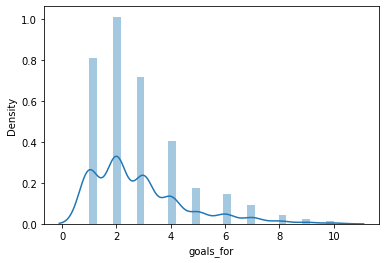

In [11]:
#analisando graficamente os gols fora
sns.distplot(df['goals_for']);

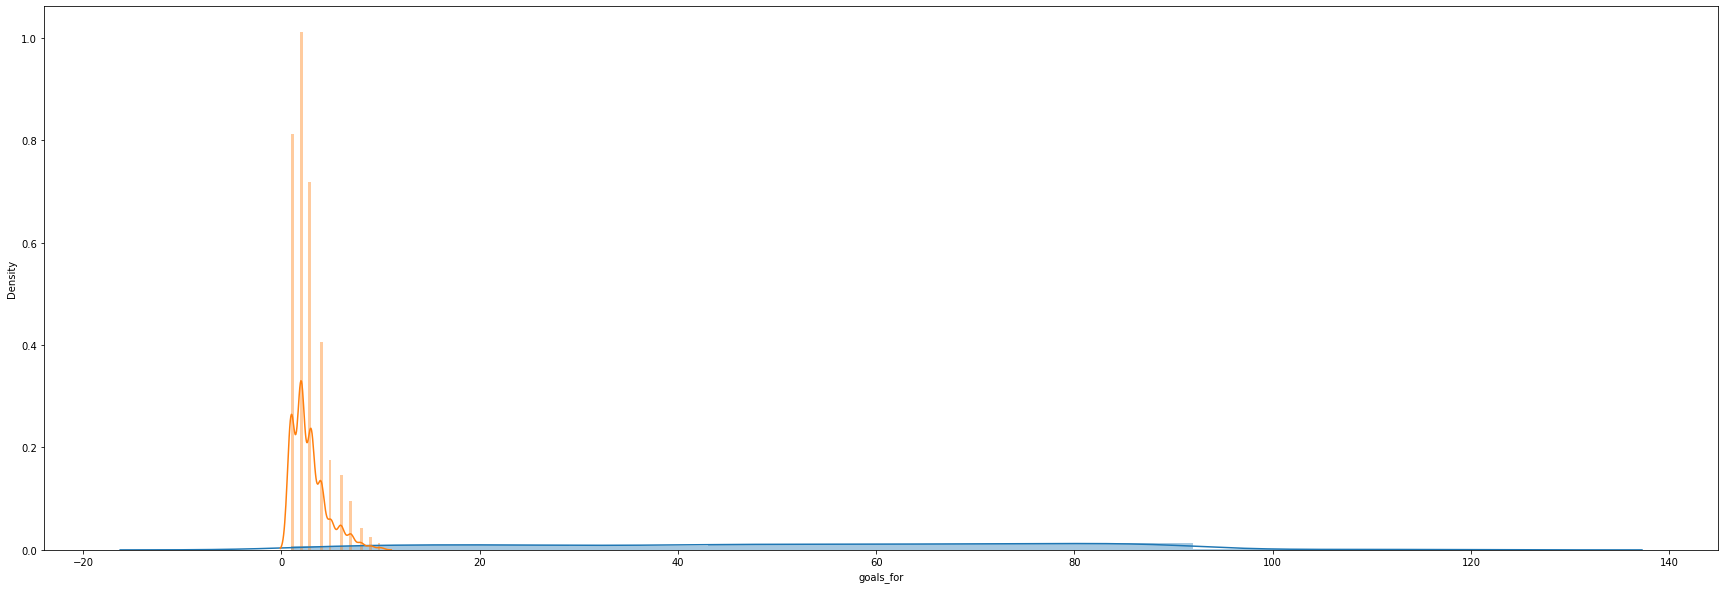

In [12]:
#indetificado que a coluna   minute_regulation esta  muito fora do padrão e um outlier
figs, axs = plt.subplots(nrows =1, ncols =1 ,figsize=(30, 10) )
#sns.scatterplot (data = df , x = 'shirt_number',y= 'minute_regulation', ax = axs[0][0])
#sns.scatterplot (data = df , x = 'minute_regulation',y= 'shirt_number', ax = axs[0][1])
sns.distplot(df['minute_regulation']);
sns.distplot(df['goals_for']);

(array([  36,   40,  117,  168,  274,  275,  279,  298,  332,  425,  548,
        555,  565,  588,  594,  647,  648,  658,  713,  762,  763,  812,
        813,  862,  898,  948, 1057, 1063, 1101, 1167, 1310, 1326, 1387,
       1416, 1442, 1477, 1539, 1554, 1558, 1583, 1633, 1751, 1772, 1809,
       1848, 1883, 1968, 1969, 2017, 2078, 2104, 2128, 2218, 2260, 2269,
       2282, 2318, 2334, 2353, 2393, 2396, 2406, 2426, 2462, 2505, 2529,
       2543]),)


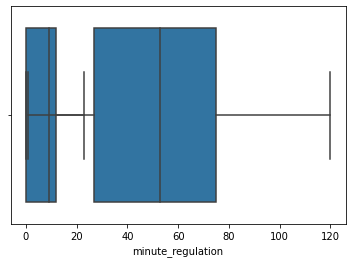

In [13]:
#analisando possiveis outliers
sns.boxplot(df['shirt_number'])
sns.boxplot(df['minute_regulation'])
print(np.where(df['minute_regulation']>90))


Index(['match_id', 'team_name', 'family_name', 'shirt_number',
       'minute_regulation', 'minute_stoppage', 'own_goal', 'penalty',
       'goal_keeper', 'defender', 'midfielder', 'forward', 'count_tournaments',
       'home_team', 'away_team', 'goals_for', 'goals_against',
       'goal_differential', 'extra_time', 'penalty_shootout', 'penalties_for',
       'penalties_against', 'win', 'lose', 'draw', 'performace'],
      dtype='object')

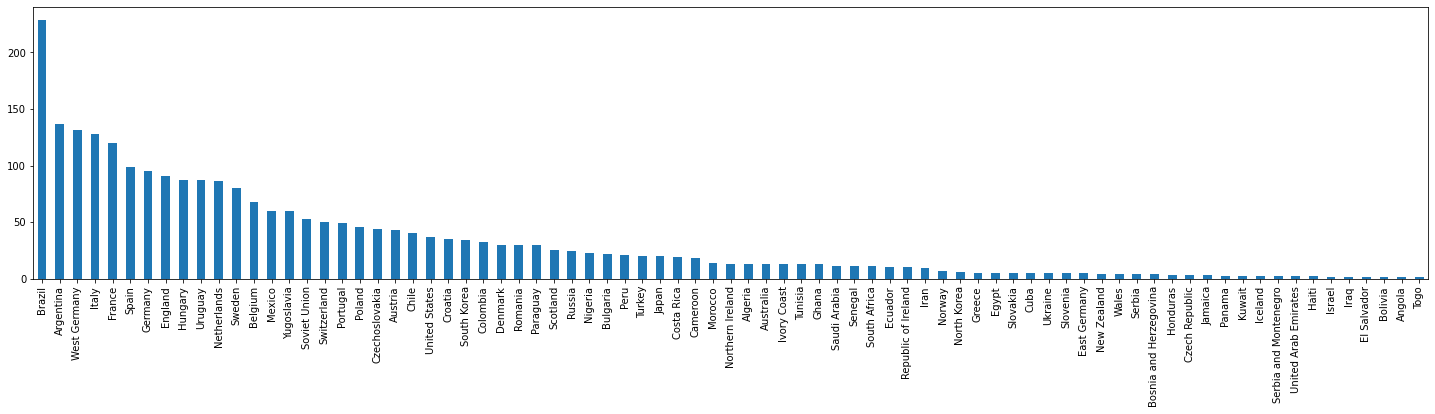

In [14]:
#verificando graficamente as selecoes que mais ganharam em copas 
plt.figure(figsize=(25, 5)) 
df.team_name.value_counts().plot(kind ='bar')
df.columns

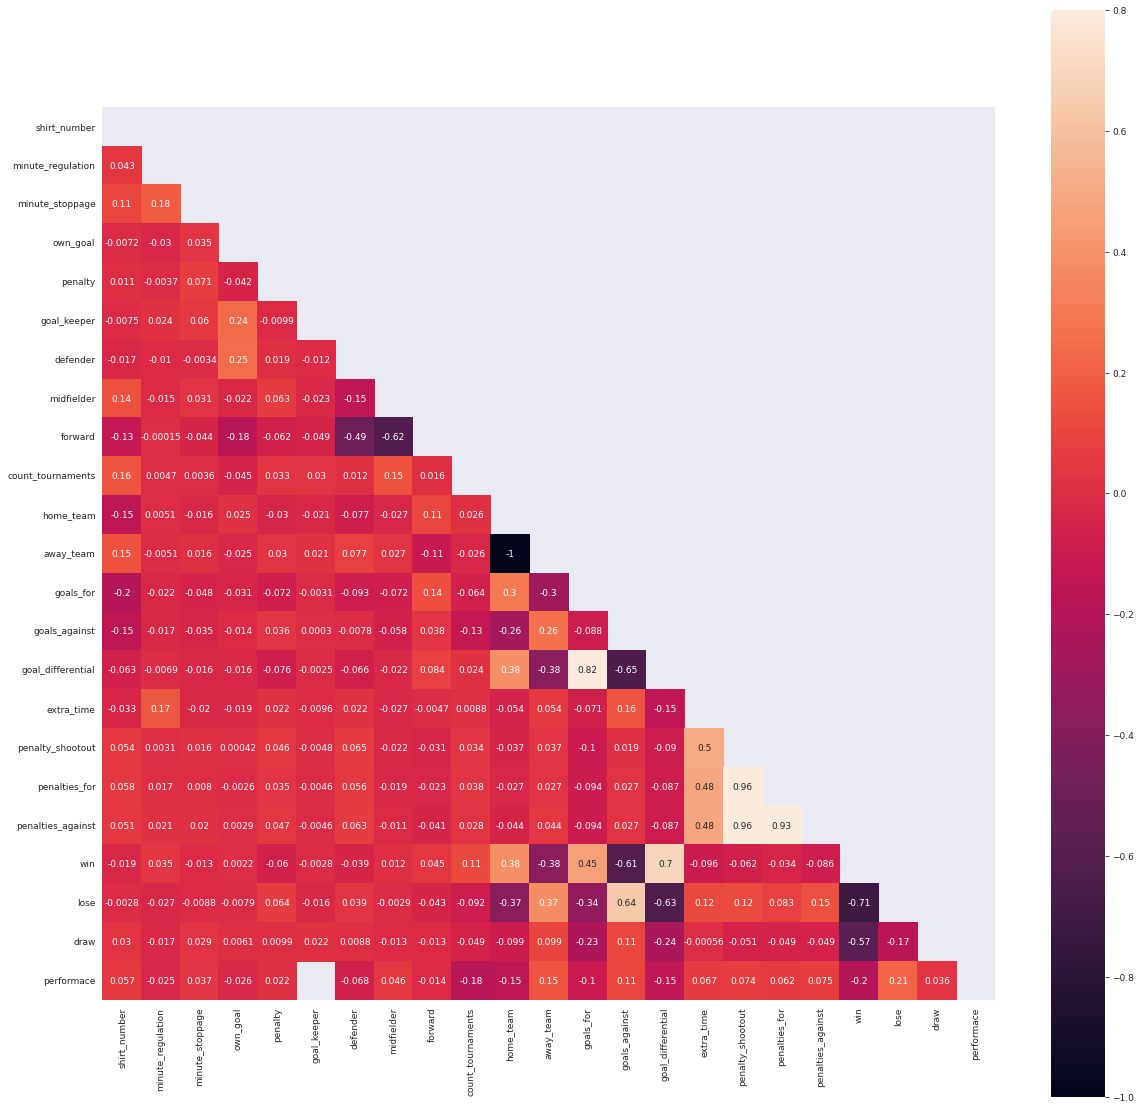

In [15]:
# Aqui podemos ver a correlçao dos dados um com os outros  quanto mais perto de 1 mais elas se correlacionan    
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 9
matplotlib.rcParams['figure.figsize'] = (19, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
raw_data=['match_id', 'team_name', 'family_name', 'shirt_number','minute_regulation', 'minute_stoppage', 'own_goal', 'penalty', 'goal_keeper', 'defender', 'midfielder', 'forward', 'count_tournaments','home_team', 'away_team', 'goals_for', 'goals_against','goal_differential', 'extra_time', 'penalty_shootout', 'penalties_for','penalties_against', 'win', 'lose', 'draw','performace']

corrmat = df[raw_data].corr()
#setamos dimensão do meu grafico
fig = plt.figure(figsize = (20, 20))
#ajust gráfico
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

In [16]:
# Média da coluna e desvio padrao dos dados
mediamarcados = df['goals_for'].mean() 
mediasofridos = df['goals_against'].mean() 
desvio = df['win'].std() 
print("Desvio padrão ", desvio)
print("Média gols marcados ", mediamarcados)
print("Média gols sofridos", mediasofridos)


Desvio padrão  0.456368363229295
Média gols marcados  2.8241758241758244
Média gols sofridos 1.3218210361067504


# **PRÉ-PROCESSAMENTO**

In [17]:
#Aqui estamos renomeando as colunas nao definidas e as colunas que estao com nome pouco familiar
df.rename(columns={'match_id':'id_partida' , 'team_name':'nome_time', 'family_name':'nome_jogador', 'shirt_number':'numero_camisa',
       'minute_regulation':'tempo_regulamentar', 'minute_stoppage':'minuto_acrescimo', 'own_goal':'gol_contra', 'penalty':'gols_penalti',
       'goal_keeper':'goleiro', 'defender':'defesa', 'midfielder':'meia', 'forward':'atacante', 'count_tournaments':'qtd_copas',
       'home_team':'time_casa', 'away_team':'time_fora', 'goals_for':'gols_fora', 'goals_against':'gols_casa',
       'goal_differential':'diferenca_gols', 'extra_time':'tempo_extra', 'penalty_shootout':'teve_penalti', 'penalties_for':'penalti_adversario',
       'penalties_against':'penalti_time', 'win':'vitoria', 'lose':'derrota', 'draw':'empate','performace':'performace'}, inplace=True)
#deixando todas minusculas
df.columns.str.lower()

Index(['id_partida', 'nome_time', 'nome_jogador', 'numero_camisa',
       'tempo_regulamentar', 'minuto_acrescimo', 'gol_contra', 'gols_penalti',
       'goleiro', 'defesa', 'meia', 'atacante', 'qtd_copas', 'time_casa',
       'time_fora', 'gols_fora', 'gols_casa', 'diferenca_gols', 'tempo_extra',
       'teve_penalti', 'penalti_adversario', 'penalti_time', 'vitoria',
       'derrota', 'empate', 'performace'],
      dtype='object')

In [18]:
#criando um backup de nossa base original
dforiginal = df
df

,id_partida,nome_time,nome_jogador,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,...,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace
0,M-1998-18,Brazil,Rivaldo,10,45,2,0,0,0,0,...,0,3,0,0,0,0,1,0,0,2.0
1,M-1998-58,Brazil,Rivaldo,10,25,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,2.0
2,M-1998-58,Brazil,Rivaldo,10,59,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,2.0
3,M-2002-10,Brazil,Rivaldo,10,87,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1.0
4,M-2002-26,Brazil,Rivaldo,10,32,0,0,0,0,0,...,0,4,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,M-1990-37,Colombia,Red’n,11,115,0,0,0,0,0,...,2,-1,1,0,0,0,0,1,0,NaN
2544,M-1934-16,Germany,Lehner,0,1,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2545,M-1934-16,Germany,Lehner,0,42,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2546,M-1958-11,Paraguay,AgŸero,0,4,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,NaN


In [19]:
#dropando id da partida
df.drop('id_partida', axis=1, inplace=True)
df

,nome_time,nome_jogador,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,...,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace
0,Brazil,Rivaldo,10,45,2,0,0,0,0,1,...,0,3,0,0,0,0,1,0,0,2.0
1,Brazil,Rivaldo,10,25,0,0,0,0,0,1,...,2,1,0,0,0,0,1,0,0,2.0
2,Brazil,Rivaldo,10,59,0,0,0,0,0,1,...,2,1,0,0,0,0,1,0,0,2.0
3,Brazil,Rivaldo,10,87,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,1.0
4,Brazil,Rivaldo,10,32,0,0,0,0,0,1,...,0,4,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,Colombia,Red’n,11,115,0,0,0,0,0,1,...,2,-1,1,0,0,0,0,1,0,NaN
2544,Germany,Lehner,0,1,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2545,Germany,Lehner,0,42,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2546,Paraguay,AgŸero,0,4,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,NaN


In [20]:
#ajustado coluna categoricas
#le = LabelEncoder()
#df['performace'] =le.fit_transform(df['performace'])
#df['nome_jogador'] =le.fit_transform(df['nome_jogador'])
#df
df.shape

(2548, 25)

In [21]:
Brasilvitorias =df.loc[df['nome_time'].str.contains('Brazil')] 
Brasilvitorias[['nome_time','gols_casa','gols_fora','diferenca_gols','vitoria','derrota','empate','performace']].head(229)

,nome_time,gols_casa,gols_fora,diferenca_gols,vitoria,derrota,empate,performace
0,Brazil,0,3,3,1,0,0,2.0
1,Brazil,2,3,1,1,0,0,2.0
2,Brazil,2,3,1,1,0,0,2.0
3,Brazil,1,2,1,1,0,0,1.0
4,Brazil,0,4,4,1,0,0,1.0
...,...,...,...,...,...,...,...,...
2534,Brazil,1,2,1,1,0,0,1.0
2535,Brazil,1,2,1,1,0,0,1.0
2536,Brazil,1,3,2,1,0,0,1.0
2537,Brazil,0,4,4,1,0,0,1.0


In [22]:
#analisando a quantidade de vitorias, do brasils apenas
grupbybrazil =Brasilvitorias.groupby(by="nome_time", dropna=False).sum()
grupbybrazil


,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,atacante,qtd_copas,...,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace
nome_time,,,,,,,,,,,,,,,,,,,,,
Brazil,1440,11816,18,1,9,0,24,66,161,489,...,236,501,11,3,10,8,207,15,7,290.0


In [23]:
#tratamento de valores nulos 
##aqui mudei para 0 todos os valores Nan NULL para 0
df.fillna(value = 0,  
          inplace = True)
df

,nome_time,nome_jogador,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,...,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace
0,Brazil,Rivaldo,10,45,2,0,0,0,0,1,...,0,3,0,0,0,0,1,0,0,2.0
1,Brazil,Rivaldo,10,25,0,0,0,0,0,1,...,2,1,0,0,0,0,1,0,0,2.0
2,Brazil,Rivaldo,10,59,0,0,0,0,0,1,...,2,1,0,0,0,0,1,0,0,2.0
3,Brazil,Rivaldo,10,87,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,1.0
4,Brazil,Rivaldo,10,32,0,0,0,0,0,1,...,0,4,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,Colombia,Red’n,11,115,0,0,0,0,0,1,...,2,-1,1,0,0,0,0,1,0,0.0
2544,Germany,Lehner,0,1,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2545,Germany,Lehner,0,42,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,3.0
2546,Paraguay,AgŸero,0,4,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,0.0


In [24]:
#backup 
df.to_csv("Copa2022.csv", encoding = 'utf-8')


In [25]:
#tratamento do tipo dos dados
df.info()
df['performace'] = df['performace'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nome_time           2548 non-null   object 
 1   nome_jogador        2548 non-null   object 
 2   numero_camisa       2548 non-null   int64  
 3   tempo_regulamentar  2548 non-null   int64  
 4   minuto_acrescimo    2548 non-null   int64  
 5   gol_contra          2548 non-null   int64  
 6   gols_penalti        2548 non-null   int64  
 7   goleiro             2548 non-null   int64  
 8   defesa              2548 non-null   int64  
 9   meia                2548 non-null   int64  
 10  atacante            2548 non-null   int64  
 11  qtd_copas           2548 non-null   int64  
 12  time_casa           2548 non-null   int64  
 13  time_fora           2548 non-null   int64  
 14  gols_fora           2548 non-null   int64  
 15  gols_casa           2548 non-null   int64  
 16  difere

In [26]:
#Excluido jogadores que numca marcaram
df.drop(df.loc[df['tempo_regulamentar']==0].index, inplace=True)

In [27]:
print(df.isna().sum())

nome_time             0
nome_jogador          0
numero_camisa         0
tempo_regulamentar    0
minuto_acrescimo      0
gol_contra            0
gols_penalti          0
goleiro               0
defesa                0
meia                  0
atacante              0
qtd_copas             0
time_casa             0
time_fora             0
gols_fora             0
gols_casa             0
diferenca_gols        0
tempo_extra           0
teve_penalti          0
penalti_adversario    0
penalti_time          0
vitoria               0
derrota               0
empate                0
performace            0
dtype: int64


In [28]:
def defnames (performace):
  if (performace)==1:
    return 'campeão'
  elif(performace==2):
    return 'segundo colocado'
  elif(performace==3):
     return 'terceiro colocado'
  elif(performace==4):
     return 'quarto colocado'
  elif(performace==0):
     return 'nao ganhou a copa'

In [29]:

df.shape

(2548, 25)

In [30]:
#df['performace_desc'] =df['performace'].apply(defnames)
df.insert(24,'performace_desc',df['performace'].apply(defnames))

In [31]:
df

,nome_time,nome_jogador,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,...,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace_desc,performace
0,Brazil,Rivaldo,10,45,2,0,0,0,0,1,...,3,0,0,0,0,1,0,0,segundo colocado,2
1,Brazil,Rivaldo,10,25,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,segundo colocado,2
2,Brazil,Rivaldo,10,59,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,segundo colocado,2
3,Brazil,Rivaldo,10,87,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,campeão,1
4,Brazil,Rivaldo,10,32,0,0,0,0,0,1,...,4,0,0,0,0,1,0,0,campeão,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,Colombia,Red’n,11,115,0,0,0,0,0,1,...,-1,1,0,0,0,0,1,0,nao ganhou a copa,0
2544,Germany,Lehner,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,terceiro colocado,3
2545,Germany,Lehner,0,42,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,terceiro colocado,3
2546,Paraguay,AgŸero,0,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,nao ganhou a copa,0


In [32]:
df.corr()

,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,atacante,qtd_copas,...,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace
numero_camisa,1.000000,0.043179,0.108109,-0.007206,0.010518,-0.007508,-0.017201,0.141167,-0.132574,0.157612,...,-0.150547,-0.063392,-0.033179,0.053811,0.057636,0.051017,-0.019421,-0.002847,0.030499,-0.110110
tempo_regulamentar,0.043179,1.000000,0.175455,-0.029626,-0.003696,0.023635,-0.010489,-0.014632,-0.000145,0.004691,...,-0.017039,-0.006908,0.168245,0.003119,0.016863,0.020733,0.034782,-0.026822,-0.017444,-0.000436
minuto_acrescimo,0.108109,0.175455,1.000000,0.034801,0.070719,0.060412,-0.003429,0.030630,-0.043715,0.003642,...,-0.035032,-0.016252,-0.019908,0.015875,0.008047,0.020143,-0.013226,-0.008804,0.028766,-0.022886
gol_contra,-0.007206,-0.029626,0.034801,1.000000,-0.041782,0.237869,0.247319,-0.022336,-0.175775,-0.045115,...,-0.014020,-0.015817,-0.018649,0.000417,-0.002606,0.002946,0.002235,-0.007908,0.006082,-0.039812
gols_penalti,0.010518,-0.003696,0.070719,-0.041782,1.000000,-0.009939,0.019291,0.062562,-0.061906,0.032585,...,0.035927,-0.075907,0.021918,0.046354,0.034853,0.046611,-0.060484,0.064225,0.009857,-0.035005
goleiro,-0.007508,0.023635,0.060412,0.237869,-0.009939,1.000000,-0.011845,-0.022573,-0.048828,0.030312,...,0.000296,-0.002520,-0.009551,-0.004757,-0.004583,-0.004583,-0.002845,-0.015793,0.022376,-0.024906
defesa,-0.017201,-0.010489,-0.003429,0.247319,0.019291,-0.011845,1.000000,-0.149169,-0.487922,0.011783,...,-0.007842,-0.066411,0.022367,0.064560,0.055822,0.063462,-0.038816,0.039132,0.008754,-0.054951
meia,0.141167,-0.014632,0.030630,-0.022336,0.062562,-0.022573,-0.149169,1.000000,-0.624306,0.148407,...,-0.058016,-0.021648,-0.027254,-0.021926,-0.019339,-0.010787,0.011729,-0.002935,-0.012998,-0.001604
atacante,-0.132574,-0.000145,-0.043715,-0.175775,-0.061906,-0.048828,-0.487922,-0.624306,1.000000,0.016051,...,0.037718,0.084206,-0.004700,-0.031408,-0.022954,-0.041309,0.045467,-0.043440,-0.013047,0.067059
qtd_copas,0.157612,0.004691,0.003642,-0.045115,0.032585,0.030312,0.011783,0.148407,0.016051,1.000000,...,-0.126803,0.024458,0.008806,0.033666,0.038314,0.027979,0.112260,-0.092446,-0.049461,0.028469


In [33]:
#ax = sns.pairplot(df,hue='performace_desc')

# **PROCESSAMENTO**

**AGRUPAMENTO -KMeans**

1.   Separando dados para Treino e Teste

In [ ]:
df

In [ ]:
plt.scatter(Brasilvitorias['numero_camisa'],Brasilvitorias['tempo_regulamentar'])

In [35]:
#df2 =df.iloc[:,3:-1]
#f_classif = SelectKBest (score_func = f_classif , k=14)
df_x= df.iloc[:,3:-2]  #aqui tem todos as colunas exeto  a CLASSE
df_y= df.iloc[:,-1]
df_y

0       2
1       2
2       2
3       1
4       1
       ..
2543    0
2544    3
2545    3
2546    0
2547    0
Name: performace, Length: 2548, dtype: int64

In [36]:
df_x

,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,atacante,qtd_copas,time_casa,...,gols_fora,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate
0,45,2,0,0,0,0,1,0,2,1,...,3,0,3,0,0,0,0,1,0,0
1,25,0,0,0,0,0,1,0,2,1,...,3,2,1,0,0,0,0,1,0,0
2,59,0,0,0,0,0,1,0,2,1,...,3,2,1,0,0,0,0,1,0,0
3,87,0,0,1,0,0,1,0,2,1,...,2,1,1,0,0,0,0,1,0,0
4,32,0,0,0,0,0,1,0,2,1,...,4,0,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,115,0,0,0,0,0,1,0,1,0,...,1,2,-1,1,0,0,0,0,1,0
2544,1,0,0,0,0,0,0,1,2,1,...,3,2,1,0,0,0,0,1,0,0
2545,42,0,0,0,0,0,0,1,2,1,...,3,2,1,0,0,0,0,1,0,0
2546,4,0,0,0,0,0,0,1,1,1,...,3,2,1,0,0,0,0,1,0,0


In [ ]:
#fit = f_classif.fit (df_x, df_y)
#features = fit.transform(df_x)
#print (features)
#cols = fit.get_support (indices = True)

In [ ]:
#df_feactures =df.iloc[:,cols]
#df_feactures

In [37]:
#reduzimos a dimensionalidade dos dados
pca = PCA(n_components=2 ).fit_transform(df_x) 

In [38]:
pca
#teste padronizacao
df_x.iloc [:,:] = StandardScaler().fit_transform(df_x)
df_x;

In [ ]:
#teste normalização
#df_x =MinMaxScaler().fit(df_x)
#df_x

In [39]:
modelo1 = KMeans (n_clusters = 3 )
modelo1.fit (pca)
labels = modelo1.labels_
silhouette_score (pca,labels,metric= 'euclidean')


0.5604211245100731

In [40]:
prev=  modelo1.predict (pca)
prev

array([2, 1, 2, ..., 2, 1, 2], dtype=int32)

In [41]:
names =['nome_time','nome_jogador']


In [42]:
#mostrando resultado da clusterizacao

clustes_map = pd.DataFrame (df, columns=names)
clustes_map ['cluster'] = modelo1.labels_
clustes_map

,nome_time,nome_jogador,cluster
0,Brazil,Rivaldo,2
1,Brazil,Rivaldo,1
2,Brazil,Rivaldo,2
3,Brazil,Rivaldo,0
4,Brazil,Rivaldo,1
...,...,...,...
2543,Colombia,Red’n,0
2544,Germany,Lehner,1
2545,Germany,Lehner,2
2546,Paraguay,AgŸero,1


**CLASSIFICAÇÃO RONDON FOREST**

1.   Separando dados para Treino e Teste

In [43]:

df
#criando treinamento
df_x= df.iloc[:,3:-2]  #aqui tem todos as colunas exeto  a CLASSE
df_y= df.iloc[:,-1]    #Somente minha coluna class


x_treino , x_teste , y_treino, y_teste =train_test_split(
          df_x,
          df_y,
          test_size =0.30,
          random_state=100)

In [44]:
df

,nome_time,nome_jogador,numero_camisa,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,...,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate,performace_desc,performace
0,Brazil,Rivaldo,10,45,2,0,0,0,0,1,...,3,0,0,0,0,1,0,0,segundo colocado,2
1,Brazil,Rivaldo,10,25,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,segundo colocado,2
2,Brazil,Rivaldo,10,59,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,segundo colocado,2
3,Brazil,Rivaldo,10,87,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,campeão,1
4,Brazil,Rivaldo,10,32,0,0,0,0,0,1,...,4,0,0,0,0,1,0,0,campeão,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,Colombia,Red’n,11,115,0,0,0,0,0,1,...,-1,1,0,0,0,0,1,0,nao ganhou a copa,0
2544,Germany,Lehner,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,terceiro colocado,3
2545,Germany,Lehner,0,42,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,terceiro colocado,3
2546,Paraguay,AgŸero,0,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,nao ganhou a copa,0


In [45]:
#jogando para variavel dfarvore = nossa arvore aleatoria e passamos como parametro n_estimators que seria o numero de ramificações da arvore  conforma a quantidade de caracteristicas aumenta podemos utilziar mais ramificações
dfarvore = RandomForestClassifier (n_estimators =100)

In [46]:
#aplicando o treino com comando fit
dfarvore.fit(x_treino,y_treino)
#previsao
df_prev = dfarvore.predict (x_teste)

[[329  32  21  27  11]
 [ 49  33  13   8   4]
 [ 42  13  18   8   1]
 [ 47   8   6  23   7]
 [ 41   5   3   4  12]]


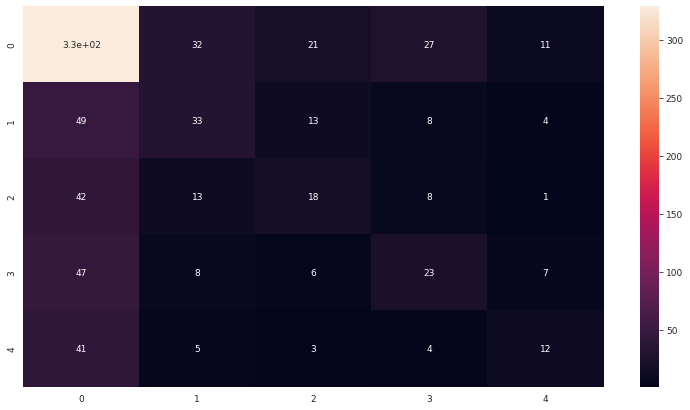

In [47]:
#grafico de matriz de confusão
df_Matrix_confusion = confusion_matrix(y_teste,df_prev)
print(df_Matrix_confusion)
plt.figure(figsize=(13,7))
sns.heatmap(df_Matrix_confusion,annot= True);

In [48]:
report = classification_report (y_teste,df_prev )
print (report)

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       420
           1       0.36      0.31      0.33       107
           2       0.30      0.22      0.25        82
           3       0.33      0.25      0.29        91
           4       0.34      0.18      0.24        65

    accuracy                           0.54       765
   macro avg       0.40      0.35      0.36       765
weighted avg       0.51      0.54      0.52       765



**ARVORE DE DECISÃO DECISION TREE CLASSIFIER**

1.   Separando dados para Treino e Teste

In [49]:
#criando treinamento
df_x= df.iloc[:,3:-2]  #aqui tem todos as colunas exeto  a CLASSE
df_y= df.iloc[:,-1]    #Somente minha coluna class


x_treino , x_teste , y_treino, y_teste =train_test_split(
          df_x,
          df_y,
          test_size =0.30,
          random_state=100)

,tempo_regulamentar,minuto_acrescimo,gol_contra,gols_penalti,goleiro,defesa,meia,atacante,qtd_copas,time_casa,...,gols_fora,gols_casa,diferenca_gols,tempo_extra,teve_penalti,penalti_adversario,penalti_time,vitoria,derrota,empate
0,45,2,0,0,0,0,1,0,2,1,...,3,0,3,0,0,0,0,1,0,0
1,25,0,0,0,0,0,1,0,2,1,...,3,2,1,0,0,0,0,1,0,0
2,59,0,0,0,0,0,1,0,2,1,...,3,2,1,0,0,0,0,1,0,0
3,87,0,0,1,0,0,1,0,2,1,...,2,1,1,0,0,0,0,1,0,0
4,32,0,0,0,0,0,1,0,2,1,...,4,0,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,115,0,0,0,0,0,1,0,1,0,...,1,2,-1,1,0,0,0,0,1,0
2544,1,0,0,0,0,0,0,1,2,1,...,3,2,1,0,0,0,0,1,0,0
2545,42,0,0,0,0,0,0,1,2,1,...,3,2,1,0,0,0,0,1,0,0
2546,4,0,0,0,0,0,0,1,1,1,...,3,2,1,0,0,0,0,1,0,0


In [55]:
#criando modelo 
#profundidade da arvore ou
#max_depth=3 NUMERO DE RAMIFICAÇÕES
df_DecisionTree = tree.DecisionTreeClassifier( max_depth=3,random_state= 10 )#max_depth=5,random_state= 31

In [56]:
#aqui estou usando um recuros chamado  feature_importances_  retorna os atributos mais importantes
df_DecisionTree= df_DecisionTree.fit(x_treino,y_treino)
df_DecisionTree.feature_importances_
for feature,importancia in zip(df_x.columns,df_DecisionTree.feature_importances_):
  print("{}:{}".format(feature,importancia))

tempo_regulamentar:0.03383626470603312
minuto_acrescimo:0.0
gol_contra:0.0
gols_penalti:0.0
goleiro:0.0
defesa:0.0
meia:0.0
atacante:0.0
qtd_copas:0.07852093057706168
time_casa:0.0559423644931289
time_fora:0.0
gols_fora:0.0
gols_casa:0.2202266719368747
diferenca_gols:0.02527024226764097
tempo_extra:0.0
teve_penalti:0.0
penalti_adversario:0.0
penalti_time:0.02511371712288809
vitoria:0.5610898088963725
derrota:0.0
empate:0.0


In [57]:
#aqui estou realizando treinamento do modelo
df_DecisionTree.fit(x_treino,y_treino)


DecisionTreeClassifier(max_depth=3, random_state=10)

In [58]:
#score 
df_DecisionTree.score (x_treino,y_treino)

0.6169377453729669

In [59]:
namecolumns=df_x.columns 

In [60]:
namecolumns

Index(['tempo_regulamentar', 'minuto_acrescimo', 'gol_contra', 'gols_penalti',
       'goleiro', 'defesa', 'meia', 'atacante', 'qtd_copas', 'time_casa',
       'time_fora', 'gols_fora', 'gols_casa', 'diferenca_gols', 'tempo_extra',
       'teve_penalti', 'penalti_adversario', 'penalti_time', 'vitoria',
       'derrota', 'empate'],
      dtype='object')

In [63]:
# plotando a arvore de decisão na tela
export_graphviz(df_DecisionTree,
		out_file = 'arvore.dot', #nome para armazenar esse grafico
		feature_names=namecolumns[0:21],
rounded = True,
filled = True
)

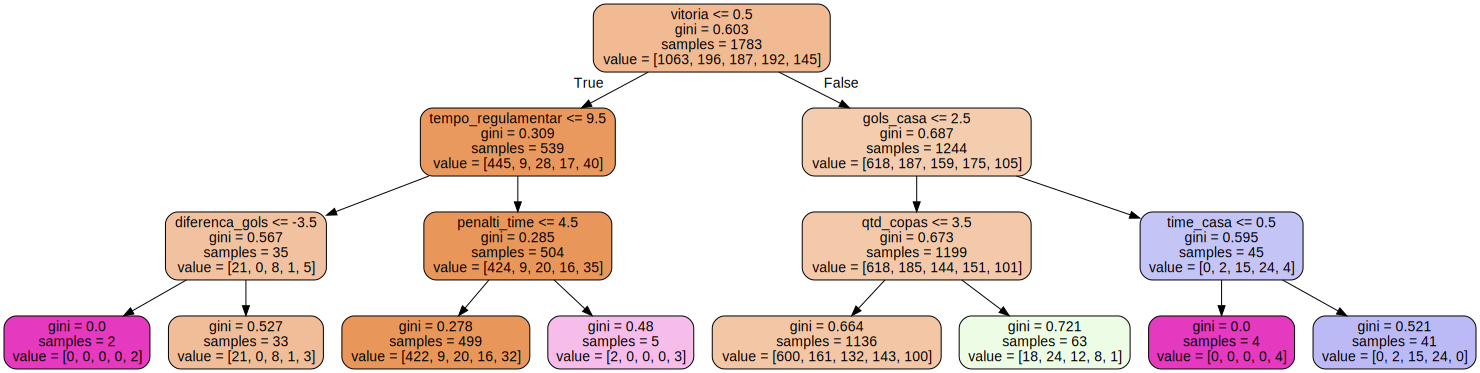

In [64]:
Source.from_file('arvore.dot')

In [65]:
#pegando a previsao
dftreeprev= df_DecisionTree.predict(x_teste)
dftreeprev

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
report = classification_report (y_teste,dftreeprev )
print (report)

              precision    recall  f1-score   support

           0       0.57      0.96      0.72       420
           1       0.33      0.12      0.18       107
           2       0.00      0.00      0.00        82
           3       0.47      0.08      0.13        91
           4       0.00      0.00      0.00        65

    accuracy                           0.56       765
   macro avg       0.27      0.23      0.21       765
weighted avg       0.42      0.56      0.43       765



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[405  13   0   0   2]
 [ 92  13   0   2   0]
 [ 70   6   0   6   0]
 [ 80   4   0   7   0]
 [ 62   3   0   0   0]]


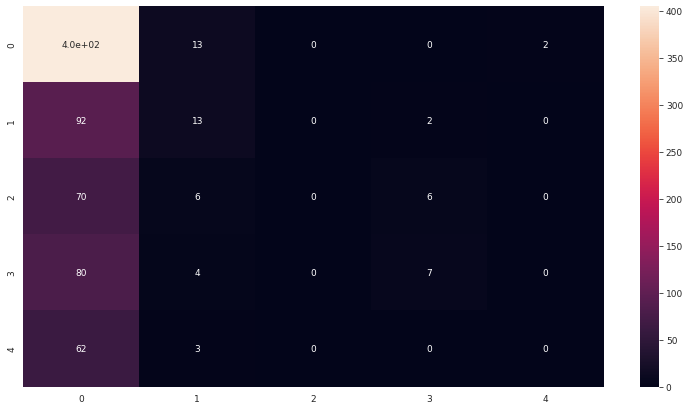

In [ ]:
df_Matrix_confusion = confusion_matrix(y_teste,dftreeprev)
print(df_Matrix_confusion)

plt.figure(figsize=(13,7))
sns.heatmap(df_Matrix_confusion,annot= True);